# **UTS - Crawling Data Hingga Fit data**

## **Crawling Data Website PTA Trunojoyo**

### 1. Install package request dan requirements
> jika pada pc anda belum terinstall package *requests* maka melakukan langkah awal installasi *requests* yang bertujuan untuk mengirim permintaan HTTP ke server.

In [ ]:
# requirements
!pip install requests
import requests
from bs4 import BeautifulSoup
import csv

### 2. Tentukan Link yang dicrawling dalam variabel

In [ ]:
# membuat variabel place dan indeks untuk menjadikan fleksibel link yang ingin dicrawling. dengan memasukkan kata kunci tujuan
place   = 'byprod'
number  =  10

# Menyimpan link web yang akan dicrawling ke dalam variabel url
url = 'https://pta.trunojoyo.ac.id/c_search/{}/{}/'.format(place, number)

### 3. Implementasi crawling

In [ ]:
# membuat variabel datas (array kosong) untuk menyimpan semua data yang dicrawling
datas = []

for ipages in range(1,50):
  response = requests.get(url+str(ipages)) # variabel response melakukan permintaan HTTP get ke url yang disimpan dan mendapatkan data dari halaman web
  soup = BeautifulSoup(response.text, 'html.parser') #Isi teks dari respons HTTP yang diterima dari server web setelah melakukan permintaan GET.
  pages = soup.findAll('li', {'data-id' :'id-1'}) #menemukan semua <li> yang memuat data-id : id-1

  # menemukan data judul, penulis, dan pembimbing
  for items in pages:

    # ==== mencari judul ====
    data_title           = items.find('a','title').text #setiap iterasi list pages mencari <a> class 'title'
    # data_span            = items.find_all('span')

    # ==== mencari penulis ====
    data_penulis         = items.find_all('span')[0].text.replace('Penulis :','') #setiap iterasi list pages mencari <span> ambil indeksnya [0]

    # ==== mencari pembimbing ====
    data_pembimbing1     = items.find_all('span')[1].text.replace('Dosen Pembimbing I :','') #[1]
    data_pembimbing2     = items.find_all('span')[2].text.replace('Dosen Pembimbing II :','') #[2]

    # ==== mencari abstrak ====
    button_abstrak_pages   = items.find('a','gray button').get('href') #setiap iterasi list pages mencari <a> ambil link href
    response_abstrak_pages = requests.get(button_abstrak_pages) #meminta HTTP dari setiap link yang ada di variabel button_abstrak_pages

    soup_abstrak = BeautifulSoup(response_abstrak_pages.text, 'html.parser') # Isi teks dari respons HTTP yang diterima dari server web
    abstrak =  soup_abstrak.find('p', {'align' :'justify'}).text.replace('ABSTRAK','')
    # print(abstrak)

    datas.append({
          'Judul': data_title,
          'Nama Penulis': data_penulis,
          'Pembimbing I': data_pembimbing1,
          'Pembimbing II': data_pembimbing2,
          'Abstrak' : abstrak
          })



KeyboardInterrupt: ignored

### 4. Save data pada directori saat ini

In [ ]:
# Menyimpan data dalam bentuk CSV
csv_filename = 'data_crawling_pta.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Judul', 'Nama Penulis', 'Pembimbing I', 'Pembimbing II', 'Abstrak']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datas:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

## **Normalisasi Data Teks**

### 1. Install package request dan requirements

In [ ]:
import os
import pandas as pd
import numpy as np


#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

### 2. Download data

In [ ]:
import gdown
# download data

nama_data = '/content/data_crawling_label.csv'
gdown.download(f'https://drive.google.com/uc?id=1-IdWAIZ16LN3AqRyoKhrv3Iojggt7hDf', nama_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-IdWAIZ16LN3AqRyoKhrv3Iojggt7hDf
To: /content/data_crawling_label.csv
100%|██████████| 1.25M/1.25M [00:00<00:00, 103MB/s]


'/content/data_crawling_label.csv'

In [ ]:
data = pd.read_csv('/content/data_crawling_label.csv')
data

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,Label
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE ...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,RPL
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,RPL
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,KK
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,KK
...,...,...,...,...,...,...
853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,KK
854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,KK
855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,KK
856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,KK


In [ ]:
# cek data kosong atau null
data['Abstrak'].isna().sum()

29

In [ ]:
# hapus data NaN
data.dropna(subset=['Abstrak'], inplace=True)

### **Punctuation process**

> **Punctuation process** merupakan proses normalisasi data yang bertujuan untuk menghilangkan tanda baca



In [ ]:
# recruitments punctuation
import string

# membuat kolom baru dengan nama new_abstrak untuk data baru yang dipunctuation
data['clean_abstrak'] = data['Abstrak'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

# Menghilangkan angka dari kolom 'new_abstrak'
data['clean_abstrak'] = data['clean_abstrak'].str.replace('\d+', '', regex=True)

<ipython-input-6-9fba39ddfde6>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_abstrak'] = data['Abstrak'].str.replace('[{}]'.format(string.punctuation), '').str.lower()


In [ ]:
# data

### **Stopword**

> Stopwords digunakan untuk menghilangkan kata umum yang sering muncul dalam teks seperti: di, dan, atau, dari, ke, saya.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  data['abstrak_stopword'] = data['clean_abstrak'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

In [ ]:
# data

### Tokenizing



> **Tokenizing** adalah proses memecah teks atau dokumen menjadi potongan-potongan yang lebih kecil, yang disebut token.



In [ ]:
data['tokens'] = data['abstrak_stopword'].apply(word_tokenize)

### stemming



> merupakan proses normalisasi data teks menjadikan kata dasar



In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat kolom baru untuk hasil stemming
data['stemmed_tokens'] = None

# Melakukan stemming pada setiap elemen dalam kolom 'tokens' tanpa fungsi atau list comprehension
for index, row in data.iterrows(): #perulangan indeks, row dari data
    stemmed_tokens = []
    for word in row['tokens']:
      # print(word)
      stemmed_word = stemmer.stem(word)
      # print(stemmed_word)
      stemmed_tokens.append(stemmed_word)
    # print(stemmed_tokens)
    data.at[index, 'stemmed_tokens'] = stemmed_tokens



# data

### Merge



> merupakan proses penggabungan kata yang telah dinormalisasi dijadikan menjadi satu kalimat utuh



In [ ]:
# menggabungkan kata
data['final_abstrak'] = data['stemmed_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
data = data[['Judul', 'Penulis', 'Dosen Pembimbing I', 'Dosen Pembimbing II',
            'Abstrak', 'clean_abstrak', 'abstrak_stopword', 'tokens',
            'stemmed_tokens', 'final_abstrak', 'Label']]
data

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,clean_abstrak,abstrak_stopword,tokens,stemmed_tokens,final_abstrak,Label
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE ...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,sistem informasi akademik siakad merupakan ...,sistem informasi akademik siakad merupakan ...,"[sistem, informasi, akademik, siakad, merupaka...","[sistem, informasi, akademik, siakad, rupa, si...",sistem informasi akademik siakad rupa sistem i...,RPL
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den...","[jalan, koneksi, jaring, komputer, dengan, lan...",jalan koneksi jaring komputer dengan lancar da...,RPL
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak...","[web, server, adalah, buah, perangkat, lunak, ...",web server adalah buah perangkat lunak server ...,RPL
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,penjadwalan kuliah di perguruan tinggi me...,penjadwalan kuliah di perguruan tinggi me...,"[penjadwalan, kuliah, di, perguruan, tinggi, m...","[jadwal, kuliah, di, guru, tinggi, rupa, masal...",jadwal kuliah di guru tinggi rupa masalah yang...,KK
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ...","[iring, kembang, teknologi, yang, ada, dunia, ...",iring kembang teknologi yang ada dunia muncul ...,KK
...,...,...,...,...,...,...,...,...,...,...,...
853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,investasi saham selama ini memiliki resiko ker...,investasi saham selama ini memiliki resiko ker...,"[investasi, saham, selama, ini, memiliki, resi...","[investasi, saham, lama, ini, milik, resiko, r...",investasi saham lama ini milik resiko rugi yan...,KK
854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,information retrieval ir merupakan pengambilan...,information retrieval ir merupakan pengambilan...,"[information, retrieval, ir, merupakan, pengam...","[information, retrieval, ir, rupa, ambil, info...",information retrieval ir rupa ambil informasi ...,KK
855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,klasifikasi citra merupakan proses pengelompok...,klasifikasi citra merupakan proses pengelompok...,"[klasifikasi, citra, merupakan, proses, pengel...","[klasifikasi, citra, rupa, proses, kelompok, p...",klasifikasi citra rupa proses kelompok piksel ...,KK
856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,identifikasi atribut pejalan kaki merupakan sa...,identifikasi atribut pejalan kaki merupakan sa...,"[identifikasi, atribut, pejalan, kaki, merupak.

## VSM  
VSM (Vector Space Model) adalah sebuah model matematika yang digunakan untuk merepresentasikan teks atau dokumen dalam bentuk vektor di dalam ruang berdimensi tinggi.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#coun_vect = CountVectorizer()
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(data['final_abstrak'])
count_array = count_matrix.toarray()
df_countMatrix = pd.DataFrame(data=count_array,columns = vectorizer.vocabulary_.keys())
df_countMatrix

,sistem,informasi,akademik,siakad,rupa,yang,fungsi,tangan,kelola,dan,...,from,accelerated,segment,augmentasi,weak,stump,ransel,detector,anchor,pretrained
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Binary

> Binary merupakan sebuah pengolahan data yang bertujuan agar dapat digunakan oleh algoritma machine learning. Binary akan mengkonversi kata unik menjadi vektor binner yaitu 1 0.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(drop="if_binary")

# Melakukan one-hot encoding pada kolom 'final_abstrak'
one_hot_encoded = encoder.fit_transform(df_countMatrix)

# Mendapatkan nama fitur (kolom)
fitur_names = encoder.get_feature_names_out(input_features=df_countMatrix.columns)

# Membuat DataFrame dari hasil one-hot encoding
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=fitur_names)

# Cetak DataFrame one-hot encoded
one_hot_df


,sistem_1,informasi_2,akademik_1,siakad_1,rupa_2,yang_1,fungsi_0,fungsi_1,fungsi_2,tangan_1,...,segment_1,augmentasi_0,augmentasi_2,augmentasi_3,weak_8,stump_3,ransel_4,detector_1,anchor_1,pretrained_1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
one_hot_df_final = pd.concat([data["Abstrak"],one_hot_df,data["Label"]],axis=1)
one_hot_df_final

,Abstrak,sistem_1,informasi_2,akademik_1,siakad_1,rupa_2,yang_1,fungsi_0,fungsi_1,fungsi_2,...,augmentasi_0,augmentasi_2,augmentasi_3,weak_8,stump_3,ransel_4,detector_1,anchor_1,pretrained_1,Label
0,Sistem informasi akademik (SIAKAD) merupaka...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
1,Berjalannya koneksi jaringan komputer dengan l...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
2,Web server adalah sebuah perangkat lunak serve...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
4,Seiring perkembangan teknologi yang ada diduni...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
670,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
679,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
680,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
# cek data
one_hot_df_final.isna().sum()

Abstrak         29
sistem_1        29
informasi_2     29
akademik_1      29
siakad_1        29
                ..
ransel_4        29
detector_1      29
anchor_1        29
pretrained_1    29
Label           29
Length: 14237, dtype: int64

In [ ]:
one_hot_df_final = one_hot_df_final.dropna()

In [ ]:
one_hot_df_final

,Abstrak,sistem_1,informasi_2,akademik_1,siakad_1,rupa_2,yang_1,fungsi_0,fungsi_1,fungsi_2,...,augmentasi_0,augmentasi_2,augmentasi_3,weak_8,stump_3,ransel_4,detector_1,anchor_1,pretrained_1,Label
0,Sistem informasi akademik (SIAKAD) merupaka...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
1,Berjalannya koneksi jaringan komputer dengan l...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
2,Web server adalah sebuah perangkat lunak serve...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
4,Seiring perkembangan teknologi yang ada diduni...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,Data set yang hilang bukan merupakan masalah y...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
825,Proses seleksi penerimaan tenaga kerja merupak...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
826,Sapi merupakan salah satu hewan ternak yang me...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
827,Sistem temu kembali informasi dapat digunakan ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# save data
one_hot_df_final.to_csv('binary_matrix.csv', index=False)

#### Vectorizer

#### Term Freq

> Term Freq adalah konsep yang digunakan dalam pemrosesan teks dan analisis teks untuk mengukur sejauh mana suatu kata atau term muncul dalam sebuah dokumen atau koleksi dokumen. Term frequency menggambarkan seberapa sering sebuah kata muncul dalam teks relatif terhadap total kata dalam dokumen tersebut.






In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi DataFrame untuk Term Frequency (TF)
df = pd.DataFrame(data)

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Melakukan transformasi TF pada kolom 'final_abstrak'
tf_matrix = vectorizer.fit_transform(data['final_abstrak'])

# Membuat DataFrame dari hasil TF
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Cetak DataFrame TF
tf_df


,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,absah,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# cek data kosong
tf_df.isna().sum()

aalysis    0
aam        0
ab         0
abad       0
abadi      0
          ..
zone       0
zoning     0
zoom       0
zucara     0
zungu      0
Length: 7085, dtype: int64

In [ ]:
tf_df_final = pd.concat([data["Abstrak"],tf_df,data["Label"]],axis=1)

In [ ]:
tf_df_final

,Abstrak,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,Label
0,Sistem informasi akademik (SIAKAD) merupaka...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
1,Berjalannya koneksi jaringan komputer dengan l...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
2,Web server adalah sebuah perangkat lunak serve...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
4,Seiring perkembangan teknologi yang ada diduni...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
670,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
679,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
680,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
# cek data kosong
tf_df_final.isna().sum()

Abstrak    29
aalysis    29
aam        29
ab         29
abad       29
           ..
zoning     29
zoom       29
zucara     29
zungu      29
Label      29
Length: 7087, dtype: int64

In [ ]:
tf_df_final = tf_df_final.dropna()

In [ ]:
tf_df_final.to_csv('tf_matrix.csv', index=False)

#### Log Freq

>  Log Freq adalah perhitungan bobot kata atau istilah (term weights) dalam representasi vektor dokumen. Ini bertujuan untuk mengurangi dampak kata-kata yang muncul sangat sering dalam koleksi dokumen, sehingga kata-kata tersebut tidak mendominasi bobot vektor.



In [ ]:
import numpy as np

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Melakukan transformasi TF pada kolom 'final_abstrak'
tf_matrix = vectorizer.fit_transform(data['final_abstrak'])

# Menghitung log-TF dengan logaritma natural (ln)
log_tf_matrix = np.log1p(tf_matrix)

# Membuat DataFrame dari hasil log-TF
log_tf_df = pd.DataFrame(log_tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Cetak DataFrame log-TF
log_tf_df

,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,absah,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
log_tf_df.isna().sum()

aalysis    0
aam        0
ab         0
abad       0
abadi      0
          ..
zone       0
zoning     0
zoom       0
zucara     0
zungu      0
Length: 7085, dtype: int64

In [ ]:
log_tf_df_final = pd.concat([data["Abstrak"],log_tf_df,data["Label"]],axis=1)

In [ ]:
log_tf_df_final.isna().sum()

Abstrak    29
aalysis    29
aam        29
ab         29
abad       29
           ..
zoning     29
zoom       29
zucara     29
zungu      29
Label      29
Length: 7087, dtype: int64

In [ ]:
log_tf_df_final = log_tf_df_final.dropna()

In [ ]:
log_tf_df_final.isna().sum()

Abstrak    0
aalysis    0
aam        0
ab         0
abad       0
          ..
zoning     0
zoom       0
zucara     0
zungu      0
Label      0
Length: 7087, dtype: int64

In [ ]:
# Menyimpan DataFrame ke dalam berkas CSV
log_tf_df_final.to_csv('log_tf_matrix.csv', index=False)

#### TF-IDF



> metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(data['final_abstrak'])

# Membuat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Cetak DataFrame TF-IDF
tfidf_df

,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,absah,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df.isna().sum()

aalysis    0
aam        0
ab         0
abad       0
abadi      0
          ..
zone       0
zoning     0
zoom       0
zucara     0
zungu      0
Length: 7085, dtype: int64

In [ ]:
# # Menyimpan DataFrame ke dalam berkas CSV
# tfidf_df.to_csv('tfidf_matrix.csv', index=False)

#### Gabungkan TFIDF dengan label

In [ ]:
df_tfidf_final = pd.concat([data['Abstrak'],tfidf_df,data['Label']],axis=1)
df_tfidf_final

,Abstrak,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,Label
0,Sistem informasi akademik (SIAKAD) merupaka...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,RPL
1,Berjalannya koneksi jaringan komputer dengan l...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,RPL
2,Web server adalah sebuah perangkat lunak serve...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,RPL
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,KK
4,Seiring perkembangan teknologi yang ada diduni...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,KK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.082786,0.0,0.0,NaN
670,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NaN
679,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NaN
680,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NaN


In [ ]:
# hapus data kosong
df_tfidf_final.isna().sum()

Abstrak    29
aalysis    29
aam        29
ab         29
abad       29
           ..
zoning     29
zoom       29
zucara     29
zungu      29
Label      29
Length: 7087, dtype: int64

In [ ]:
df_tfidf_final = df_tfidf_final.dropna()

In [ ]:
df_tfidf_final

,Abstrak,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,Label
0,Sistem informasi akademik (SIAKAD) merupaka...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
1,Berjalannya koneksi jaringan komputer dengan l...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
2,Web server adalah sebuah perangkat lunak serve...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RPL
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
4,Seiring perkembangan teknologi yang ada diduni...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,Data set yang hilang bukan merupakan masalah y...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
825,Proses seleksi penerimaan tenaga kerja merupak...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
826,Sapi merupakan salah satu hewan ternak yang me...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK
827,Sistem temu kembali informasi dapat digunakan ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KK


In [ ]:
# Menyimpan DataFrame ke dalam berkas CSV
df_tfidf_final.to_csv('tfidf_matrix.csv', index=False)

### Split data TFIDF

In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
# Bagi data menjadi pelatihan (80%) dan pengujian (20%)
X_tfidf = df_tfidf_final.iloc[:,1:-1]
# X_tfidf
y_tfidf = df_tfidf_final["Label"]
# y_tfidf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)



In [ ]:
print("panjang data",len(df_tfidf_final))
print("panjang x_tfidf_train",len(X_tfidf_train))
print("panjang x_tfidf_test",len(X_tfidf_test))

panjang data 800
panjang x_tfidf_train 640
panjang x_tfidf_test 160


In [ ]:
X_tfidf_train.to_csv("X_tfidf_train.csv",index=False)
X_tfidf_test.to_csv("X_tfidf_test.csv",index=False)


## **Reduksi Dimensi dengan Menggunakan Latent Dirichlet Allocation (LDA)**

### Import library yang diperlukan

In [ ]:
import numpy as np
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import os

### Pilih data yang akan digunakan

In [ ]:
# # binary
# data_binary = pd.read_csv("/content/binary.csv")
# # log_tf
# data_log_tf = pd.read_csv("/content/log_tf.csv")
# # tf
# data_tf     = pd.read_csv("/content/tf_df.csv")
# tfidf
data_tfidf_train  = X_tfidf_train
data_tfidf_test   = X_tfidf_test

### menggunakan data tfidf

In [ ]:
# data_tfidf_train
# data_tfidf_test

In [ ]:
print(len(data_tfidf_train))
print(len(data_tfidf_test))

640
160


### **Proses Latent Dirichlet Allocation (LDA)**

In [ ]:
# import
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# membuat variable k, alpha dan beta untuk proses LDA

k = int(input('masukkan nilai k untuk topik : '))
alpha = 0.1
beta = 0.2

masukkan nilai k untuk topik : 20


##### TFidf Train

In [ ]:
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen_train = lda_model.fit_transform(data_tfidf_train)

# simpan kolom
topik_kolom = []

for i in range(1,k+1):
  topik_kolom.append(f'Topik {i}')
  print (f". . . . topik {i} telah dibuat")

. . . . topik 1 telah dibuat
. . . . topik 2 telah dibuat
. . . . topik 3 telah dibuat
. . . . topik 4 telah dibuat
. . . . topik 5 telah dibuat
. . . . topik 6 telah dibuat
. . . . topik 7 telah dibuat
. . . . topik 8 telah dibuat
. . . . topik 9 telah dibuat
. . . . topik 10 telah dibuat
. . . . topik 11 telah dibuat
. . . . topik 12 telah dibuat
. . . . topik 13 telah dibuat
. . . . topik 14 telah dibuat
. . . . topik 15 telah dibuat
. . . . topik 16 telah dibuat
. . . . topik 17 telah dibuat
. . . . topik 18 telah dibuat
. . . . topik 19 telah dibuat
. . . . topik 20 telah dibuat


In [ ]:
proporsi_topik_dokumen_df_train = pd.DataFrame(proporsi_topik_dokumen_train, columns=topik_kolom)
# proporsi_topik_dokumen_df_train.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df_train

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10,Topik 11,Topik 12,Topik 13,Topik 14,Topik 15,Topik 16,Topik 17,Topik 18,Topik 19,Topik 20
0,0.010372,0.010372,0.010372,0.010372,0.010393,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.802909
1,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.076802,0.010406,0.735881
2,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.010038,0.809279
3,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.804718
4,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.814132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.809221
636,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.760529
637,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.788752
638,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.805109


In [ ]:
len(proporsi_topik_dokumen_df_train)

640

In [ ]:
proporsi_topik_dokumen_df_train = pd.concat([proporsi_topik_dokumen_df_train,y_tfidf_train],axis = 1)
# del proporsi_topik_dokumen_df[0]

In [ ]:
proporsi_topik_dokumen_df_train = proporsi_topik_dokumen_df_train.dropna()

In [ ]:
# cek data kosong
proporsi_topik_dokumen_df_train

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10,...,Topik 12,Topik 13,Topik 14,Topik 15,Topik 16,Topik 17,Topik 18,Topik 19,Topik 20,Label
0,0.010372,0.010372,0.010372,0.010372,0.010393,0.010372,0.010372,0.010372,0.010372,0.010372,...,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.802909,RPL
1,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,...,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.076802,0.010406,0.735881,RPL
3,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,...,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.804718,KK
4,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,...,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.814132,KK
5,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,...,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.795269,RPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,...,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.809221,KK
636,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,...,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.760529,RPL
637,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,...,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.788752,RPL
638,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,...,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.805109,RPL


In [ ]:
# # hapus data kosong
# proporsi_topik_dokumen_df.dropna(inplace=True)

# cek kembali data kosong
proporsi_topik_dokumen_df_train.isna().sum()

Topik 1     0
Topik 2     0
Topik 3     0
Topik 4     0
Topik 5     0
Topik 6     0
Topik 7     0
Topik 8     0
Topik 9     0
Topik 10    0
Topik 11    0
Topik 12    0
Topik 13    0
Topik 14    0
Topik 15    0
Topik 16    0
Topik 17    0
Topik 18    0
Topik 19    0
Topik 20    0
Label       0
dtype: int64

In [ ]:
proporsi_topik_dokumen_df_train_final = pd.concat([data['Abstrak'],proporsi_topik_dokumen_df_train],axis=1)
proporsi_topik_dokumen_df_train_final = proporsi_topik_dokumen_df_train_final.dropna()
proporsi_topik_dokumen_df_train_final

,Abstrak,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,...,Topik 12,Topik 13,Topik 14,Topik 15,Topik 16,Topik 17,Topik 18,Topik 19,Topik 20,Label
0,Sistem informasi akademik (SIAKAD) merupaka...,0.010372,0.010372,0.010372,0.010372,0.010393,0.010372,0.010372,0.010372,0.010372,...,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.010372,0.802909,RPL
1,Berjalannya koneksi jaringan komputer dengan l...,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,...,0.010406,0.010406,0.010406,0.010406,0.010406,0.010406,0.076802,0.010406,0.735881,RPL
3,Penjadwalan kuliah di Perguruan Tinggi me...,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,...,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.010278,0.804718,KK
4,Seiring perkembangan teknologi yang ada diduni...,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,...,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.009783,0.814132,KK
5,Gerak pekerja ada pada game yang memiliki genr...,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,...,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.010775,0.795269,RPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pesatnya perkembangan teknologi saat ini semak...,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,...,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.010041,0.809221,KK
636,Universitas menggunakan sistem informasi akade...,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,...,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.012604,0.760529,RPL
637,Peningkatan infrastruktur kota dalam bidang te...,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,...,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.011118,0.788752,RPL
638,AbstrakPuskesmas merupakan fasilitas pelayanan...,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,...,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.010257,0.805109,RPL


In [ ]:
proporsi_topik_dokumen_df_train_final.to_csv("proporsi_topik_dokumen_df_train_final.csv",index = False)

In [ ]:
# Proporsi kata pada topik
fitur = X_tfidf_train.columns.tolist()
ProporsiKataTopik = lda_model.components_
ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
ProporsiKataTopik_df.insert(0,'Topik',topik_kolom)
ProporsiKataTopik_df

,Topik,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,Topik 1,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
1,Topik 2,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
2,Topik 3,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
3,Topik 4,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.262401,0.200000,0.200000,0.431889,0.514498,0.200000,0.200000,0.200000
4,Topik 5,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.205066,0.205066
5,Topik 6,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
6,Topik 7,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
7,Topik 8,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
8,Topik 9,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
9,Topik 10,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.200000,0.200000,0.200000,...,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000


In [ ]:
ProporsiKataTopik_df.to_csv("ProporsiKataTopik_df_train.csv",index=False)

##### TFidf Test

In [ ]:
lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen_test = lda_model.fit_transform(data_tfidf_test)

# simpan kolom
topik_kolom = []

for i in range(1,k+1):
  topik_kolom.append(f'Topik {i}')
  print (f". . . . topik {i} telah dibuat")

. . . . topik 1 telah dibuat
. . . . topik 2 telah dibuat
. . . . topik 3 telah dibuat
. . . . topik 4 telah dibuat
. . . . topik 5 telah dibuat
. . . . topik 6 telah dibuat
. . . . topik 7 telah dibuat
. . . . topik 8 telah dibuat
. . . . topik 9 telah dibuat
. . . . topik 10 telah dibuat
. . . . topik 11 telah dibuat
. . . . topik 12 telah dibuat
. . . . topik 13 telah dibuat
. . . . topik 14 telah dibuat
. . . . topik 15 telah dibuat
. . . . topik 16 telah dibuat
. . . . topik 17 telah dibuat
. . . . topik 18 telah dibuat
. . . . topik 19 telah dibuat
. . . . topik 20 telah dibuat


In [ ]:
proporsi_topik_dokumen_df_test = pd.DataFrame(proporsi_topik_dokumen_test, columns=topik_kolom)
# proporsi_topik_dokumen_df_test.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df_test

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10,Topik 11,Topik 12,Topik 13,Topik 14,Topik 15,Topik 16,Topik 17,Topik 18,Topik 19,Topik 20
0,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.010232,0.805599,0.010232,0.010232,0.010232
1,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.010304,0.804220,0.010304,0.010304,0.010304
2,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.780222,0.011567,0.011567,0.011567
3,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.012202,0.768155,0.012202,0.012202,0.012202
4,0.010576,0.010576,0.010576,0.010576,0.010576,0.010576,0.010576,0.206092,0.010576,0.010576,0.010576,0.010577,0.010577,0.010576,0.010577,0.010576,0.603531,0.010576,0.010577,0.010576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.012218,0.105492,0.674582,0.012218,0.012218,0.012218
156,0.011691,0.011691,0.011691,0.011691,0.179710,0.011691,0.011691,0.011691,0.011691,0.011691,0.011691,0.011691,0.011691,0.011691,0.011691,0.011691,0.609857,0.011691,0.011691,0.011691
157,0.014501,0.014501,0.014501,0.014501,0.014501,0.014501,0.014501,0.014501,0.014501,0.014501,0.220687,0.014501,0.014501,0.014501,0.014501,0.014501,0.518299,0.014501,0.014501,0.014501
158,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.012127,0.769585,0.012127,0.012127,0.012127


In [ ]:
proporsi_topik_dokumen_df_test = pd.concat([proporsi_topik_dokumen_df_test,y_tfidf_test],axis = 1)
# del proporsi_topik_dokumen_df[0]

In [ ]:
proporsi_topik_dokumen_df_test = proporsi_topik_dokumen_df_test.dropna()

In [ ]:
proporsi_topik_dokumen_df_test

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10,...,Topik 12,Topik 13,Topik 14,Topik 15,Topik 16,Topik 17,Topik 18,Topik 19,Topik 20,Label
2,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,0.011567,...,0.011567,0.011567,0.011567,0.011567,0.011567,0.780222,0.011567,0.011567,0.011567,RPL
7,0.342263,0.013022,0.013022,0.013022,0.013022,0.013022,0.013022,0.013022,0.013022,0.013022,...,0.013022,0.013022,0.013022,0.013022,0.013022,0.423333,0.013022,0.013022,0.013022,KK
10,0.011812,0.011812,0.011812,0.011812,0.011812,0.011812,0.011812,0.011813,0.011812,0.011813,...,0.121629,0.011812,0.011812,0.011812,0.011812,0.665756,0.011812,0.011812,0.011812,RPL
23,0.011178,0.011178,0.011178,0.011178,0.011178,0.011178,0.011178,0.011178,0.011178,0.011178,...,0.011178,0.011178,0.011178,0.120791,0.011178,0.677998,0.011178,0.011178,0.011178,KK
29,0.010634,0.010634,0.010634,0.010634,0.010634,0.010634,0.010634,0.010634,0.010634,0.010634,...,0.010634,0.010634,0.010634,0.010634,0.010634,0.797963,0.010634,0.010634,0.010634,KK
30,0.009511,0.009511,0.009511,0.009511,0.009511,0.009511,0.009511,0.009511,0.009512,0.009511,...,0.009511,0.009521,0.009511,0.009511,0.009511,0.819279,0.009511,0.009511,0.009511,RPL
31,0.009889,0.009889,0.009889,0.009889,0.009889,0.009889,0.009889,0.009889,0.009889,0.009889,...,0.009889,0.009889,0.009889,0.009889,0.009889,0.812108,0.009889,0.009889,0.009889,RPL
33,0.012855,0.012855,0.012855,0.012855,0.012855,0.012855,0.012855,0.012855,0.012855,0.012855,...,0.012855,0.012855,0.012855,0.012855,0.012855,0.755757,0.012855,0.012855,0.012855,KK
39,0.010795,0.010795,0.010795,0.010795,0.010795,0.010795,0.010795,0.010795,0.010795,0.010795,...,0.010795,0.010795,0.010795,0.010795,0.010795,0.794890,0.010795,0.010795,0.010795,KK
49,0.014354,0.014354,0.014354,0.014354,0.014354,0.014354,0.014354,0.014354,0.014354,0.014354,...,0.014354,0.014354,0.014354,0.014354,0.014354,0.727272,0.014354,0.014354,0.014354,KK


In [ ]:
proporsi_topik_dokumen_df_test_final = pd.concat([data['Abstrak'],proporsi_topik_dokumen_df_test],axis=1)
proporsi_topik_dokumen_df_test_final = proporsi_topik_dokumen_df_test_final.dropna()
proporsi_topik_dokumen_df_test_final.to_csv("proporsi_topik_dokumen_df_test_final.csv",index=False)

In [ ]:
len(proporsi_topik_dokumen_df_test_final)

31

In [ ]:
# Proporsi kata pada topik
fitur = X_tfidf_test.columns.tolist()
ProporsiKataTopik = lda_model.components_
ProporsiKataTopik_df = pd.DataFrame(ProporsiKataTopik, columns = fitur)
ProporsiKataTopik_df.insert(0,'Topik',topik_kolom)
ProporsiKataTopik_df

,Topik,aalysis,aam,ab,abad,abadi,abai,abdi,ability,abjad,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,Topik 1,0.2,0.200000,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
1,Topik 2,0.2,0.200000,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
2,Topik 3,0.2,0.200000,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
3,Topik 4,0.2,0.200000,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
4,Topik 5,0.2,0.200000,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
5,Topik 6,0.2,0.200000,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
6,Topik 7,0.2,0.200000,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
7,Topik 8,0.2,0.332075,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
8,Topik 9,0.2,0.200000,0.200000,0.2,0.2,0.200000,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
9,Topik 10,0.2,0.200000,0.200000,0.2,0.2,0.249931,0.200000,0.2,0.2,...,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2


In [ ]:
ProporsiKataTopik_df.to_csv("ProporsiKataTopik_df_test.csv",index=False)

### Menghitung akurasi

#### Naive bayes

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

In [ ]:
# # Data yang Anda miliki

# label_encoder = LabelEncoder()
# X = proporsi_topik_dokumen_df.iloc[:, :k]  # Mengambil hanya kolom-kolom topik pertama hingga ke-k
# y = proporsi_topik_dokumen_df['Label']
# y = label_encoder.fit_transform(y)
# # X
# len(X)

In [ ]:
x_train_model = proporsi_topik_dokumen_df_train.iloc[:,:-1]
x_test_model = proporsi_topik_dokumen_df_test.iloc[:,:-1]
# x_test_model
y_train_model = proporsi_topik_dokumen_df_train.iloc[:,-1]
y_test_model = proporsi_topik_dokumen_df_test.iloc[:,-1]

In [ ]:
# Inisialisasi array untuk menyimpan akurasi
accuracies_nb = []

# Loop untuk setiap iterasi topik
for i in range(1, k + 1):
    # Train and Test split
    # X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :i], y, test_size=0.3, random_state=0)

    # Inisialisasi model Naive Bayes
    nb = GaussianNB()

    # Latih model pada kolom topik tertentu
    nb.fit(x_train_model, y_train_model)

    # Lakukan prediksi
    y_pred = nb.predict(x_test_model)

    # Hitung akurasi dan tambahkan ke array akurasi
    accuracy = round(accuracy_score(y_test_model, y_pred)*100,2)
    accuracies_nb.append(accuracy)

accuracies_nb


[70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97,
 70.97]

In [ ]:
accuracy_nb_df = pd.DataFrame({'Topik': range(1, k + 1), 'Akurasi': accuracies_nb})
accuracy_nb_df.to_csv("accuracy_nb_df.csv",index=False)

In [ ]:
accuracy_nb_df

,Topik,Akurasi
0,1,70.97
1,2,70.97
2,3,70.97
3,4,70.97
4,5,70.97
5,6,70.97
6,7,70.97
7,8,70.97
8,9,70.97
9,10,70.97


In [ ]:
accuracy_nb_df.to_csv("accuracies_nb_df.csv",index=False)

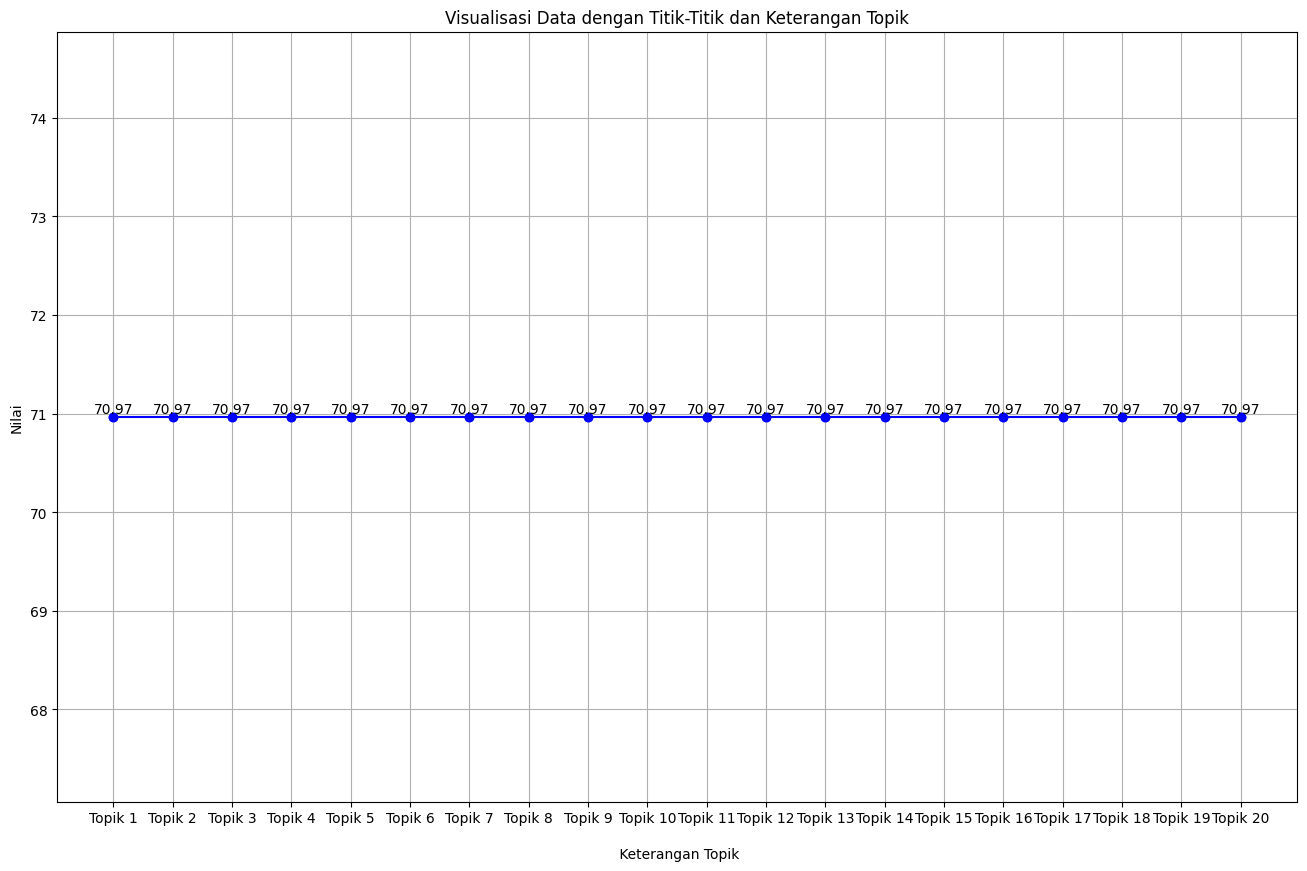

In [ ]:
import matplotlib.pyplot as plt

data_accuracy_nb = accuracies_nb
topics = topik_kolom

# Membuat plot
# Menghitung jumlah data
num_data = len(data_accuracy_nb)

# Menentukan faktor skala untuk figsize berdasarkan jumlah data
scale_factor = num_data / 10  # Ganti 10 dengan angka yang sesuai

# Membuat plot dengan figsize yang disesuaikan
plt.figure(figsize=(8 * scale_factor, len(data_accuracy_nb)/2))
# Menambahkan garis yang menghubungkan titik-titik
plt.plot(topics, data_accuracy_nb, color='b', marker='o', linestyle='-')

plt.scatter(topics, data_accuracy_nb, color='b', marker='o')
plt.title("Visualisasi Data dengan Titik-Titik dan Keterangan Topik")
plt.xlabel("\n Keterangan Topik")
plt.ylabel("Nilai")
plt.grid(True)

# Menampilkan keterangan nilai di atas titik-titik
for i in range(len(data_accuracy_nb)):
    plt.text(topics[i], data_accuracy_nb[i], f"{data_accuracy_nb[i]:.2f}", ha='center', va='bottom')

plt.show()

In [ ]:
# yang paling tinggi nilainya
max_acc_nb = max(data_accuracy_nb)
ind_max_acc_nb = np.argmax(data_accuracy_nb)


print(f'''
Data yang paling tinggi yaitu : {max_acc_nb}
Pada Topik                    : {topik_kolom[ind_max_acc_nb]}
''')


Data yang paling tinggi yaitu : 70.97
Pada Topik                    : Topik 1



In [ ]:
import joblib
# Simpan model ke dalam file

joblib.dump(nb, 'model_naive_bayes.pkl')

['model_naive_bayes.pkl']

In [ ]:
data

,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak,clean_abstrak,abstrak_stopword,tokens,stemmed_tokens,final_abstrak,Label
0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE ...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...,sistem informasi akademik siakad merupakan ...,sistem informasi akademik siakad merupakan ...,"[sistem, informasi, akademik, siakad, merupaka...","[sistem, informasi, akademik, siakad, rupa, si...",sistem informasi akademik siakad rupa sistem i...,RPL
1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den...","[jalan, koneksi, jaring, komputer, dengan, lan...",jalan koneksi jaring komputer dengan lancar da...,RPL
2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK ENK...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak...","[web, server, adalah, buah, perangkat, lunak, ...",web server adalah buah perangkat lunak server ...,RPL
3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...,penjadwalan kuliah di perguruan tinggi me...,penjadwalan kuliah di perguruan tinggi me...,"[penjadwalan, kuliah, di, perguruan, tinggi, m...","[jadwal, kuliah, di, guru, tinggi, rupa, masal...",jadwal kuliah di guru tinggi rupa masalah yang...,KK
4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ...","[iring, kembang, teknologi, yang, ada, dunia, ...",iring kembang teknologi yang ada dunia muncul ...,KK
...,...,...,...,...,...,...,...,...,...,...,...
853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,investasi saham selama ini memiliki resiko ker...,investasi saham selama ini memiliki resiko ker...,"[investasi, saham, selama, ini, memiliki, resi...","[investasi, saham, lama, ini, milik, resiko, r...",investasi saham lama ini milik resiko rugi yan...,KK
854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,information retrieval ir merupakan pengambilan...,information retrieval ir merupakan pengambilan...,"[information, retrieval, ir, merupakan, pengam...","[information, retrieval, ir, rupa, ambil, info...",information retrieval ir rupa ambil informasi ...,KK
855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,klasifikasi citra merupakan proses pengelompok...,klasifikasi citra merupakan proses pengelompok...,"[klasifikasi, citra, merupakan, proses, pengel...","[klasifikasi, citra, rupa, proses, kelompok, p...",klasifikasi citra rupa proses kelompok piksel ...,KK
856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,identifikasi atribut pejalan kaki merupakan sa...,identifikasi atribut pejalan kaki merupakan sa...,"[identifikasi, atribut, pejalan, kaki, merupak.

teknik informatika merupakan salah satu teknik ang paling banyak digunakan dalam dunia salah satunya tentang web

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

inp = input("masukkan teks: ")
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tf_inp = tfidf_vectorizer.fit_transform([inp])

# Mendapatkan nama fitur (kolom)
fitur_names = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame dari hasil one-hot encoding
tfidf_inp_df = pd.DataFrame(tf_inp.toarray(), columns=fitur_names)
tfidf_inp_df


masukkan teks: coba


,coba
0,1.0


In [ ]:
k_inp = k
alpha_inp = 0.1
beta_inp = 0.2

lda_model_inp = LatentDirichletAllocation(n_components=k_inp, doc_topic_prior=alpha_inp, topic_word_prior=beta_inp)
# Proporsi topik pada dokumen
proporsi_topik_dokumen_inp = lda_model_inp.fit_transform(tfidf_inp_df)

# simpan kolom
topik_kolom_inp = []

for i in range(1, k_inp + 1):
    topik_kolom_inp.append(f'Topik {i}')
    # print (i)

# # ====================== topik pd dokumen =========
inp_proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen_inp, columns=topik_kolom_inp)
# # proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
inp_proporsi_topik_dokumen_df

# Lakukan prediksi
model_inp = nb
predict_inp = model_inp.predict(inp_proporsi_topik_dokumen_df)

inp_proporsi_topik_dokumen_df
predict_inp

array(['RPL'], dtype='<U3')

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Inisialisasi array untuk menyimpan akurasi
accuracies_knn = []

# Loop untuk setiap iterasi topik
for i in range(1, k + 1):
    # Train and Test split
    # x_train_model, X_test, y_train_model, y_test = train_test_split(X.iloc[:, :i], y, test_size=0.3, random_state=0)

    # Inisialisasi model Naive Bayes
    knn = KNeighborsClassifier()

    # Latih model pada kolom topik tertentu
    knn.fit(x_train_model, y_train_model)

    # Lakukan prediksi
    y_pred = knn.predict(x_test_model)

    # Hitung akurasi dan tambahkan ke array akurasi
    accuracy = round(accuracy_score(y_test_model, y_pred)*100,2)
    accuracies_knn.append(accuracy)

accuracies_knn


[29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03,
 29.03]

In [ ]:
accuracies_knn_df = pd.DataFrame({'Topik': range(1, k + 1), 'Akurasi': accuracies_knn})
accuracies_knn_df.to_csv("accuracies_knn_df.csv",index=False)

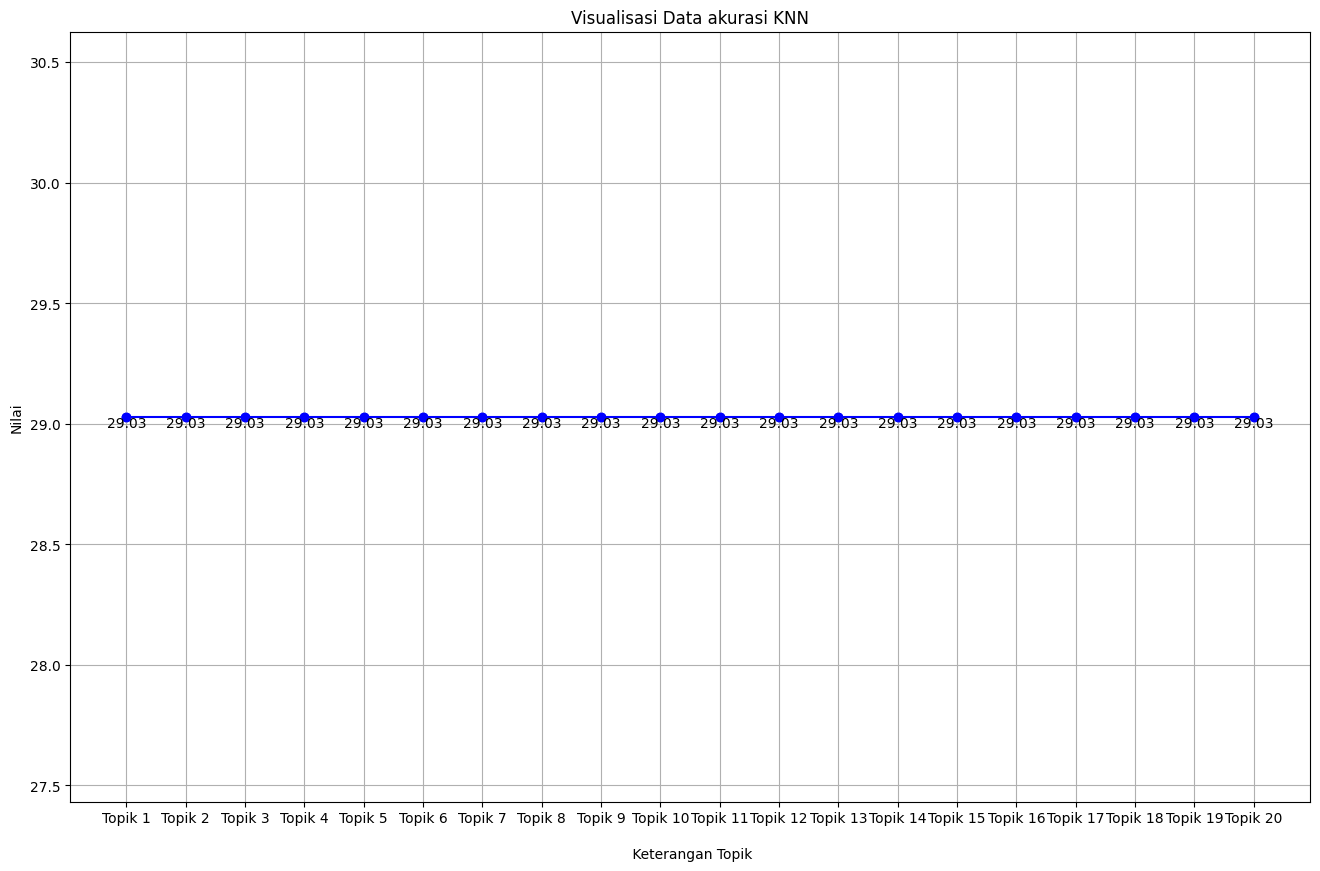


Data yang paling tinggi yaitu : 29.03
Pada Topik                    : Topik 1



In [ ]:
import matplotlib.pyplot as plt

data_accuracy_knn = accuracies_knn
topics = topik_kolom

# Membuat plot
# Menghitung jumlah data
num_data = len(data_accuracy_knn)

# Menentukan faktor skala untuk figsize berdasarkan jumlah data
scale_factor = num_data / 10  # Ganti 10 dengan angka yang sesuai

# Membuat plot dengan figsize yang disesuaikan
plt.figure(figsize=(8 * scale_factor, len(data_accuracy_knn)/2))

# Menambahkan garis yang menghubungkan titik-titik
plt.plot(topics, data_accuracy_knn, color='b', marker='o', linestyle='-')

plt.scatter(topics, data_accuracy_knn, color='b', marker='o')

plt.title("Visualisasi Data akurasi KNN")
plt.xlabel("\n Keterangan Topik")
plt.ylabel("Nilai")
plt.grid(True)

# Menampilkan keterangan nilai di atas titik-titik
for i in range(len(data_accuracy_knn)):
    plt.text(topics[i], data_accuracy_knn[i], f"{data_accuracy_knn[i]:.2f}", ha='center', va='top')

plt.show()

# yang paling tinggi nilainya
max_acc_knn = max(data_accuracy_knn)
ind_max_acc_knn = np.argmax(data_accuracy_knn)


print(f'''
Data yang paling tinggi yaitu : {max_acc_knn}
Pada Topik                    : {topik_kolom[ind_max_acc_knn]}
''')

In [ ]:
# Lakukan prediksi
model_inp = knn
predict_inp = model_inp.predict(inp_proporsi_topik_dokumen_df)

inp_proporsi_topik_dokumen_df
predict_inp

array(['RPL'], dtype=object)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inisialisasi array untuk menyimpan akurasi
accuracies_rf = []

# Loop untuk setiap iterasi topik
for i in range(1, k + 1):
    # Train and Test split
    # X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :i], y, test_size=0.3, random_state=0)

    # Inisialisasi model Naive Bayes
    rf = RandomForestClassifier()

    # Latih model pada kolom topik tertentu
    rf.fit(x_train_model, y_train_model)

    # Lakukan prediksi
    y_pred = rf.predict(x_test_model)

    # Hitung akurasi dan tambahkan ke array akurasi
    accuracy = round(accuracy_score(y_test_model, y_pred)*100,2)
    accuracies_rf.append(accuracy)

accuracies_rf


[64.52,
 64.52,
 67.74,
 64.52,
 61.29,
 70.97,
 67.74,
 64.52,
 64.52,
 74.19,
 64.52,
 67.74,
 61.29,
 64.52,
 74.19,
 67.74,
 61.29,
 67.74,
 70.97,
 64.52]

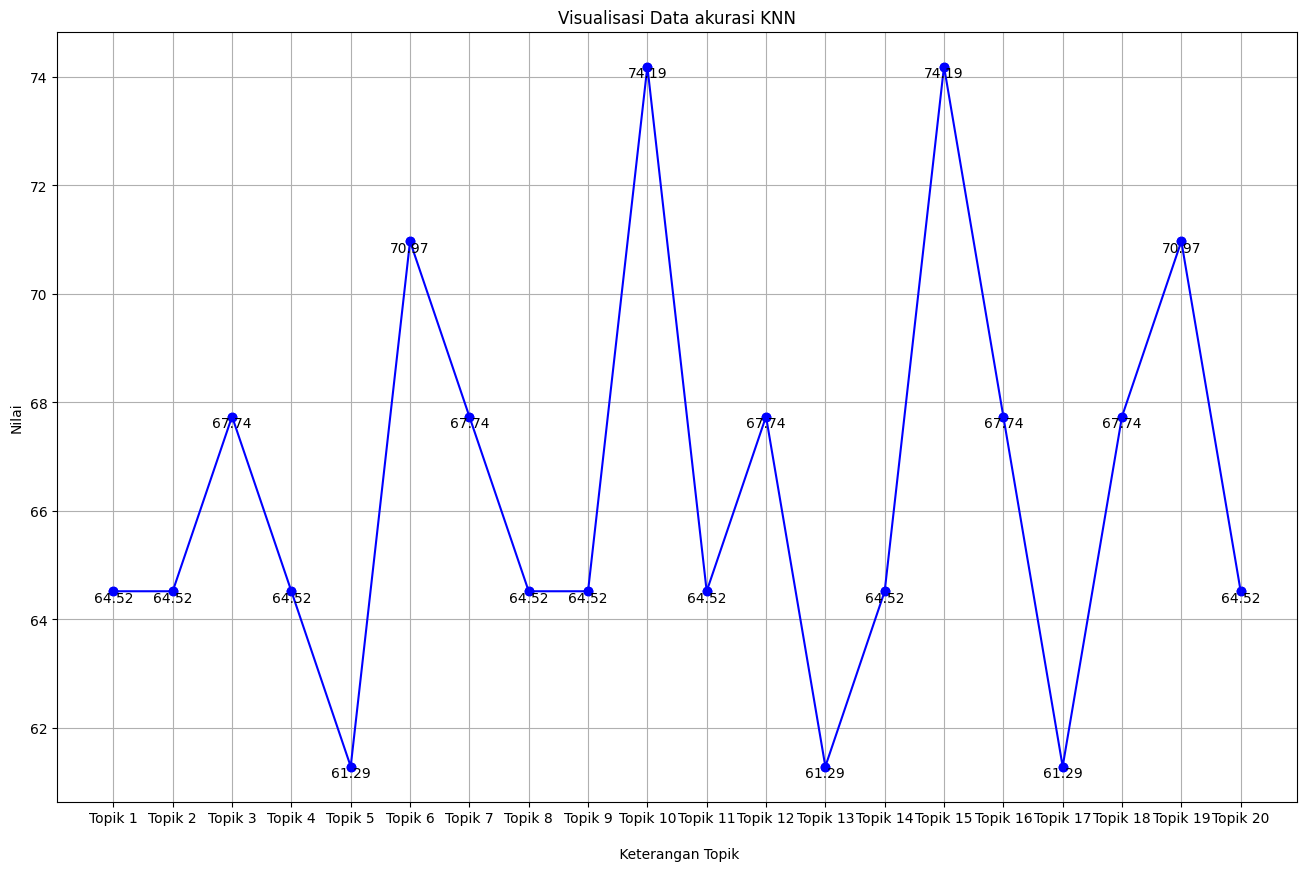


Data yang paling tinggi yaitu : 74.19
Pada Topik                    : Topik 10



In [ ]:
import matplotlib.pyplot as plt

data_accuracy_rf = accuracies_rf
topics = topik_kolom

# Membuat plot
# Menghitung jumlah data
num_data = len(data_accuracy_rf)

# Menentukan faktor skala untuk figsize berdasarkan jumlah data
scale_factor = num_data / 10  # Ganti 10 dengan angka yang sesuai

# Membuat plot dengan figsize yang disesuaikan
plt.figure(figsize=(8 * scale_factor, len(data_accuracy_rf)/2))

# Menambahkan garis yang menghubungkan titik-titik
plt.plot(topics, data_accuracy_rf, color='b', marker='o', linestyle='-')

plt.scatter(topics, data_accuracy_rf, color='b', marker='o')

plt.title("Visualisasi Data akurasi KNN")
plt.xlabel("\n Keterangan Topik")
plt.ylabel("Nilai")
plt.grid(True)

# Menampilkan keterangan nilai di atas titik-titik
for i in range(len(data_accuracy_rf)):
    plt.text(topics[i], data_accuracy_rf[i], f"{data_accuracy_rf[i]:.2f}", ha='center', va='top')

plt.show()

# yang paling tinggi nilainya
max_acc_rf = max(data_accuracy_rf)
ind_max_acc_rf = np.argmax(data_accuracy_rf)


print(f'''
Data yang paling tinggi yaitu : {max_acc_rf}
Pada Topik                    : {topik_kolom[ind_max_acc_rf]}
''')

In [ ]:
# Simpan model ke dalam file
# joblib.dump(rf_model, 'rf_model.pkl')
# Simpan model ke dalam file
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
# Lakukan prediksi
model_inp = rf
predict_inp = model_inp.predict(inp_proporsi_topik_dokumen_df)

inp_proporsi_topik_dokumen_df
predict_inp

array(['RPL'], dtype=object)

In [ ]:
accuracies_rf_df = pd.DataFrame({'Topik': range(1, k + 1), 'Akurasi': accuracies_rf})
accuracies_rf_df.to_csv("accuracies_rf_df.csv",index=False)

### Perbandingan Akurasi Model

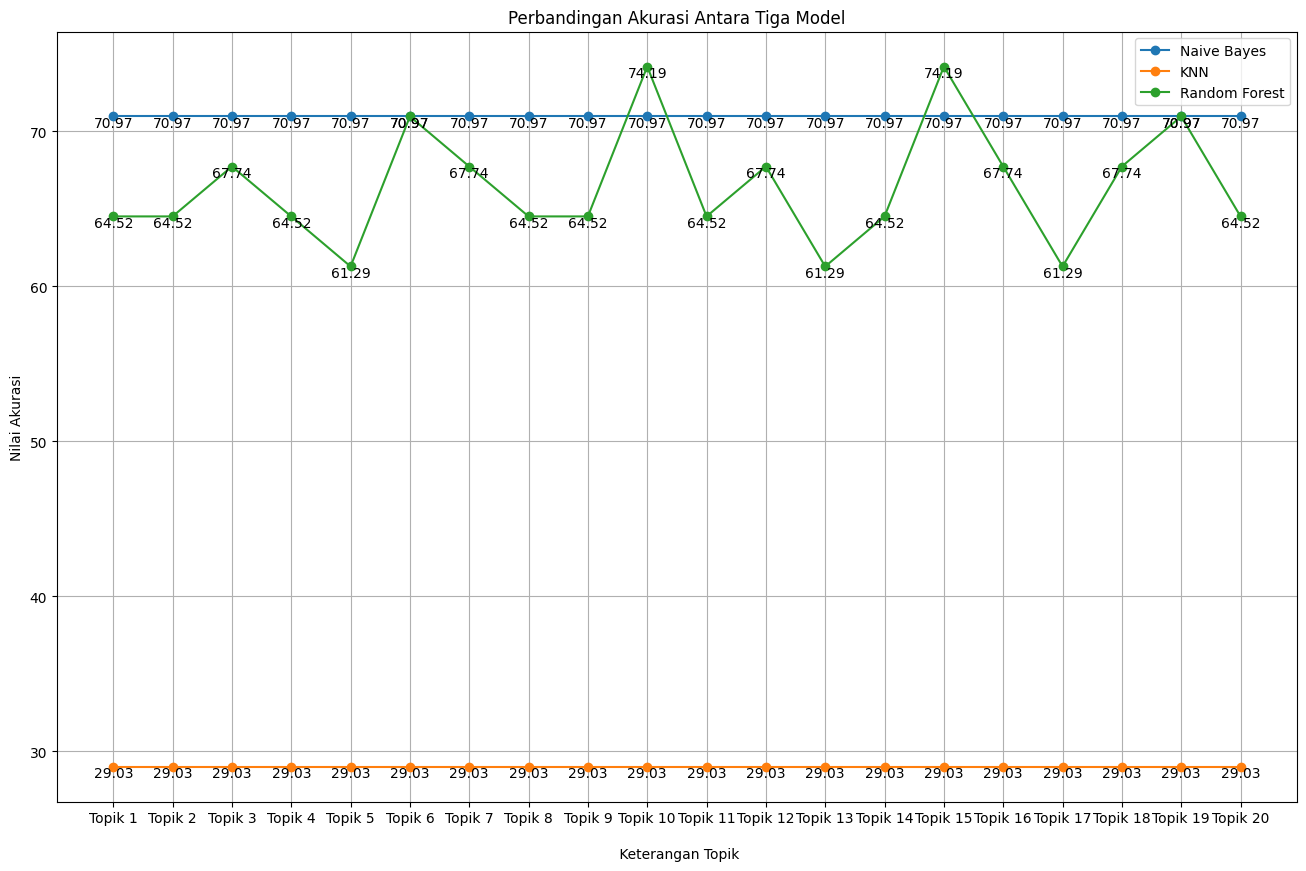

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data

topics = topik_kolom

# Membuat plot dengan tiga garis yang berbeda untuk setiap set data
# Menghitung jumlah data
num_data = len(data_accuracy_rf)

# Menentukan faktor skala untuk figsize berdasarkan jumlah data
scale_factor = num_data / 10  # Ganti 10 dengan angka yang sesuai

# Membuat plot dengan figsize yang disesuaikan
plt.figure(figsize=(8 * scale_factor, len(data_accuracy_rf)/2))
plt.plot(topics, data_accuracy_nb, marker='o', label='Naive Bayes')
plt.plot(topics, data_accuracy_knn, marker='o', label='KNN')
plt.plot(topics, data_accuracy_rf, marker='o', label='Random Forest')

for i in range(len(data_accuracy_nb)):
    plt.text(topics[i], data_accuracy_nb[i], f"{data_accuracy_nb[i]:.2f}", ha='center', va='top')
for i in range(len(data_accuracy_knn)):
    plt.text(topics[i], data_accuracy_knn[i], f"{data_accuracy_knn[i]:.2f}", ha='center', va='top')
for i in range(len(data_accuracy_rf)):
    plt.text(topics[i], data_accuracy_rf[i], f"{data_accuracy_rf[i]:.2f}", ha='center', va='top')

plt.title("Perbandingan Akurasi Antara Tiga Model")
plt.xlabel("\n Keterangan Topik")
plt.ylabel("Nilai Akurasi")
plt.grid(True)
plt.legend()

plt.show()


#### Save

In [ ]:
from google.colab import files
# files.download('/content/accuracies_nb_df.csv')
# files.download('/content/lda_model.pkl')
files.download('/content/rf_model.pkl')
# files.download('/content/accuracies_rf_df.csv')
# files.download('/content/ProporsiKataTopik_df_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
1+1

2

In [ ]:
import joblib
# Simpan model ke dalam file

joblib.dump(proporsi_topik_dokumen_df_train, 'proporsi_topik_dokumen_df_train.pkl')

['proporsi_topik_dokumen_df_train.pkl']

### Implementasi

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

inp = input("masukkan teks: ")
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tf_inp = tfidf_vectorizer.fit_transform([inp])

# Mendapatkan nama fitur (kolom)
fitur_names = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame dari hasil one-hot encoding
tfidf_inp_df = pd.DataFrame(tf_inp.toarray(), columns=fitur_names)
tfidf_inp_df

masukkan teks: coba dulu ya


,coba,dulu,ya
0,0.57735,0.57735,0.57735


In [ ]:
lda_model_inp = LatentDirichletAllocation(n_components=8, doc_topic_prior=alpha, topic_word_prior=beta)
proporsi_topik_dokumen_inp = lda_model_inp.fit_transform(tfidf_inp_df)
proporsi_topik_dokumen_inp

array([[0.72353161, 0.03949548, 0.03949548, 0.03949548, 0.03949548,
        0.03949548, 0.03949548, 0.03949548]])

In [ ]:
# Simpan model ke dalam file
joblib.dump(lda_model, 'lda_model.pkl')

['lda_model.pkl']

In [ ]:
lda_model = LatentDirichletAllocation(n_components=8, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen_train_imp = lda_model.fit_transform(data_tfidf_train)

# simpan kolom
topik_kolom = []

for i in range(1,8+1):
  topik_kolom.append(f'Topik {i}')
  print (f". . . . topik {i} telah dibuat")

proporsi_topik_dokumen_df_train_imp = pd.DataFrame(proporsi_topik_dokumen_train_imp, columns=topik_kolom)

proporsi_topik_dokumen_df_train_imp = pd.concat([proporsi_topik_dokumen_df_train_imp,y_tfidf_train],axis = 1)
proporsi_topik_dokumen_df_train_imp = proporsi_topik_dokumen_df_train_imp.dropna()

# Proporsi topik pada dokumen
proporsi_topik_dokumen_test_imp = lda_model.fit_transform(data_tfidf_test)

proporsi_topik_dokumen_df_test_imp = pd.DataFrame(proporsi_topik_dokumen_test_imp, columns=topik_kolom)

proporsi_topik_dokumen_df_test_imp = pd.concat([proporsi_topik_dokumen_df_test_imp,y_tfidf_test],axis = 1)
proporsi_topik_dokumen_df_test_imp = proporsi_topik_dokumen_df_test_imp.dropna()


# ====================
x_train_model_imp = proporsi_topik_dokumen_df_train_imp.iloc[:,:-1]
x_test_model_imp = proporsi_topik_dokumen_df_test_imp.iloc[:,:-1]
# x_test_model_imp
y_train_model_imp = proporsi_topik_dokumen_df_train_imp.iloc[:,-1]
y_test_model_imp = proporsi_topik_dokumen_df_test_imp.iloc[:,-1]

# Inisialisasi array untuk menyimpan akurasi
accuracies_rf_model = []

# Loop untuk setiap iterasi topik
for i in range(1, 8 + 1):
    # Train and Test split
    # X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :i], y, test_size=0.3, random_state=0)

    # Inisialisasi model Naive Bayes
    rf_model_imp = RandomForestClassifier()

    # Latih model pada kolom topik tertentu
    rf_model_imp.fit(x_train_model_imp, y_train_model_imp)

    # Lakukan prediksi
    y_pred = rf_model_imp.predict(x_test_model_imp)

    # Hitung akurasi dan tambahkan ke array akurasi
    accuracy = round(accuracy_score(y_test_model_imp, y_pred)*100,2)
    accuracies_rf_model.append(accuracy)

accuracies_rf_model


. . . . topik 1 telah dibuat
. . . . topik 2 telah dibuat
. . . . topik 3 telah dibuat
. . . . topik 4 telah dibuat
. . . . topik 5 telah dibuat
. . . . topik 6 telah dibuat
. . . . topik 7 telah dibuat
. . . . topik 8 telah dibuat


[61.29, 70.97, 58.06, 64.52, 58.06, 58.06, 64.52, 61.29]

In [ ]:
proporsi_topik_dokumen_df_train_imp

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Label
0,0.011846,0.011846,0.917076,0.011847,0.011846,0.011846,0.011846,0.011846,RPL
1,0.011891,0.011892,0.916760,0.011892,0.011891,0.011891,0.011891,0.011891,RPL
3,0.011724,0.011724,0.917894,0.011759,0.011724,0.011724,0.011724,0.011724,KK
4,0.011084,0.011084,0.646792,0.286706,0.011084,0.011084,0.011084,0.011084,KK
5,0.012375,0.012375,0.913371,0.012376,0.012375,0.012375,0.012375,0.012375,RPL
...,...,...,...,...,...,...,...,...,...
635,0.011417,0.011417,0.920082,0.011417,0.011418,0.011417,0.011417,0.011417,KK
636,0.014850,0.014850,0.896053,0.014850,0.014850,0.014850,0.014850,0.014850,RPL
637,0.012830,0.012830,0.910189,0.012830,0.012830,0.012830,0.012830,0.012830,RPL
638,0.011697,0.011697,0.918119,0.011698,0.011697,0.011697,0.011697,0.011697,RPL


In [ ]:
rf_model_imp

RandomForestClassifier()

In [ ]:
# Simpan model ke dalam file
# joblib.dump(rf_model, 'rf_model.pkl')
# Simpan model ke dalam file
joblib.dump(rf_model_imp, 'rf_model_imp.joblib',protocol=2)
files.download('/content/rf_model_imp.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# simpan kolom
topik_kolom_imp = []

for i in range(1, 8 + 1):
    topik_kolom_imp.append(f'Topik {i}')
    # print (i)

# # ====================== topik pd dokumen =========
imp_proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen_inp, columns=topik_kolom_imp)
# # proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
imp_proporsi_topik_dokumen_df

# Lakukan prediksi
model_imp = rf_model_imp
predict_imp = model_imp.predict(imp_proporsi_topik_dokumen_df)

# imp_proporsi_topik_dokumen_df
predict_imp

array(['RPL'], dtype=object)

In [ ]:
model_imp_cb = joblib.load("rf_model_imp.joblib")
predict_imp = model_imp_cb.predict(imp_proporsi_topik_dokumen_df)

# imp_proporsi_topik_dokumen_df
predict_imp

array(['RPL'], dtype=object)

In [ ]:
sklearn.__version__
joblib.__version__

'1.3.2'